In [25]:
import pandas as pd
import numpy as np
import cv2
from imutils import paths
from imutils import url_to_image
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk

In [2]:
types = np.array(['triceratops', 'trex', 'pterodactly', 'brontosaurus', 'ankylosaurus']) # list of possible predictor variables

In [3]:
image = cv2.imread('images\\ankylosaurus\\1.png') #takes an image so that we can practice transforming it

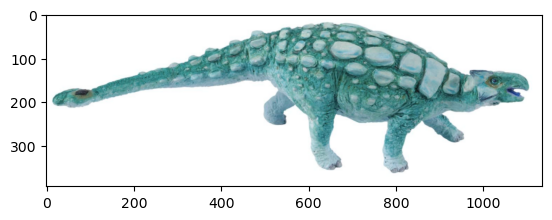

In [4]:
#original image
plt.imshow(image)

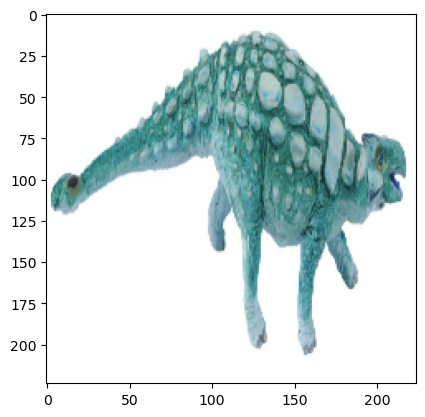

In [5]:
# resizing
image = cv2.resize(image, (224,224))
plt.imshow(image)

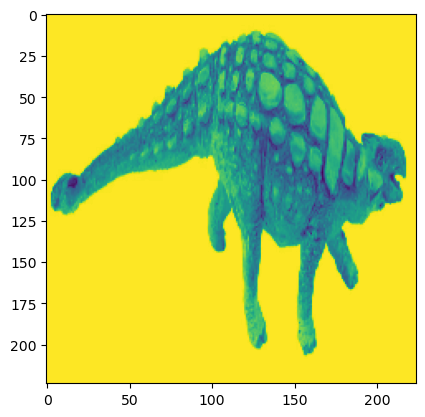

In [6]:
#grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [7]:
images = []
dino_types = []
for dino_type in types:
    pics = list(paths.list_images(f'images\\{dino_type}')) #enters folder of images
    for pic in pics:
        image = cv2.imread(pic) #takes individual picture from folder
        image = cv2.resize(image, (224,224)) #resizing, to make each image have same num of pixels
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # grayscale, because its easier to work with compared with color
        images.append(np.concatenate(image)) #unpacks pixels and adds to array of images
        dino_types.append(dino_type) # adds to list of pedictor variables


In [8]:
# takes image pixels and converts it to a dataframe
# dino_pics = pd.DataFrame(images)
# dino_pics

In [9]:
# splits data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(images, dino_types, test_size=0.2, random_state=42)

In [10]:
# initializing sklearn model and fitting
tim = MultinomialNB()
tim.fit(X_train, y_train)

MultinomialNB()

In [11]:
# calculate training accuracy
train_pred = tim.predict(X_train)
accuracy_score(y_train,train_pred)

0.859375

In [12]:
# calculating test accuracy
test_pred = tim.predict(X_test)
accuracy_score(y_test,test_pred)

0.78125

In [13]:
def dino_class(url):
    try:
        image = url_to_image(url)
    except ValueError:
        return 'Please insert an image URL'
    else:
        image = cv2.resize(image, (224,224))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return f"Oh wow! That's a very nice {tim.predict(image.reshape(1, -1))[0]}!"

In [14]:
url = \
'''

'''

In [15]:
dino_class(url)

'Please insert an image URL'

In [28]:
window = tk.Tk()
window.geometry('500x450')
window.title('Dino Predictor')

def make_prediction():
    dino_input = dino_input_slot.get()
    prediction=messagebox.showinfo( "Wow!", dino_class(dino_input))

label = tk.Label(window, text='Submit a dinosaur image URL!', font=('Arial',18))
label.pack(padx=20, pady=20)

dino_input_slot = tk.Entry(window)
dino_input_slot.pack()

submit = tk.Button(window, text='submit!', command = make_prediction)
submit.pack()

derpy_dino = Image.open('derpy_dinosaur.png').resize((300,300))
derpy_dino = ImageTk.PhotoImage(derpy_dino)

derpy_dino_img = tk.Label(window, image=derpy_dino)
derpy_dino_img.pack()

window.mainloop()